In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms

import numpy as np
from PIL import Image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import json
imagenet_classes = json.load(open('imagenet_classes.json'))
idx2class = [imagenet_classes[str(i)].split(',')[0] for i in range(1000)]
class2idx = {v:i for i,v in enumerate(idx2class)}

In [4]:
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ubuntu/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:09<00:00, 57238217.90it/s]


VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU (inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU (inplace)
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU (inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU (inplace)
    (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [5]:
img_transforms = transforms.Compose([transforms.Scale((256, 256), Image.BICUBIC),
                                     transforms.RandomCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
def unnorm(x):
    un_x = 255*(x*0.5+0.5)
    return un_x.astype(np.uint8)

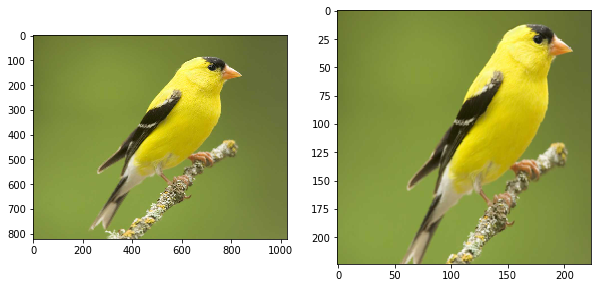

In [6]:
img = Image.open('bird.jpg')
img_tensor = img_transforms(img)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.asarray(img))
plt.subplot(1,2,2)
plt.imshow(unnorm(img_tensor.numpy()).transpose(1,2,0))

In [7]:
img_var = torch.autograd.Variable(img_tensor.unsqueeze(0), requires_grad=True)
out = vgg16(img_var)
print(str(np.argmax(out.data.numpy())) + ":" + idx2class[np.argmax(out.data.numpy())])

11:goldfinch


In [8]:
criterion = torch.nn.CrossEntropyLoss()
label = torch.autograd.Variable(torch.LongTensor(np.array([11])))
loss = criterion(out, label)
loss.backward()

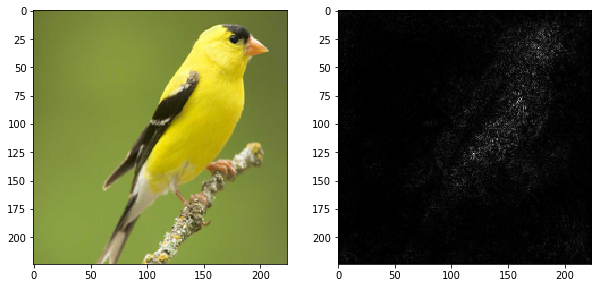

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(unnorm(img_tensor.numpy()).transpose(1,2,0))
plt.subplot(1,2,2)
plt.imshow(np.abs(img_var.grad.data.numpy()[0]).max(axis=0), cmap='gray')